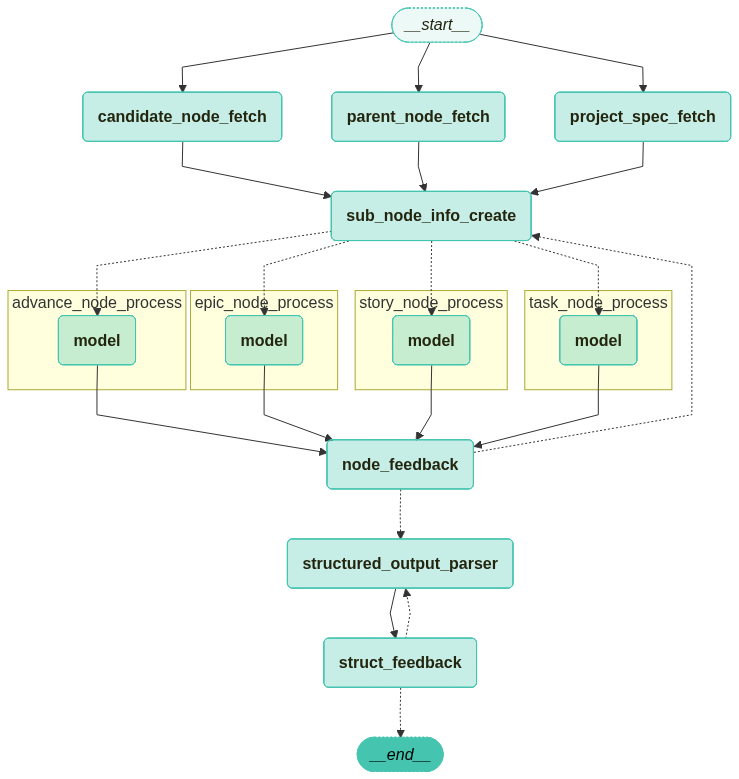

In [1]:
import sys
import os
from langchain_teddynote.graphs import visualize_graph
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from app.agents.enums import NodeType
from app.agents.graph import builder

graph = builder.compile()
visualize_graph(graph, xray=True)

In [2]:
from app.core.log import langfuse_handler

graph.invoke({
    "workspace_id": 0,
    "candidate_id": 5,
    "parent_id": 5
}, config={"callbacks": [langfuse_handler]} )

{'workspace_id': 0,
 'headcount': None,
 'workspace_info': None,
 'is_valid': True,
 'parent_id': 5,
 'parent_info': <app.db.models.TaskNode at 0x1beae782090>,
 'candidate_id': 5,
 'current_candidate_info': <app.db.models.Candidate at 0x1beae7818b0>,
 'generated_node': {'name': '단계별 가중치 스코어링 모듈 구현 (scoreService) — 고성능·확장성 고려 심화 과제',
  'description': '독립적인 추천 스코어링 모듈(scoreService)을 설계·구현합니다. 입력으로 장소 목록(거리(m), 평점(0-5), 실시간 혼잡도(0-1 또는 등급))을 받고, 거리 40%, 평점 30%, 혼잡도 30% 가중합으로 정규화된 최종 추천 점수를 계산하여 장소별 score 필드를 추가한 배열과 정렬된 추천 리스트를 반환합니다. 모듈은 거리·평점·혼잡도 정규화 함수를 분리하고, 확장성(새 가중치 항목 추가), 성능 최적화(벡터화·캐싱·병렬처리), 테스트 용이성, 운영(모니터링·계측), 및 기존 시스템과의 호환성 고려를 명세합니다.',
  'difficulty': 4,
  'technical_analysis': '목표 및 범위\n- 목표: 사용자에게 장소 추천을 위해 거리(40%), 평점(30%), 실시간 혼잡도(30%)를 반영한 정규화된 스코어를 계산하는 독립 모듈을 구현.\n- 입력: 장소 객체 배열. 각 장소는 최소한 { id, distance_m, rating_0_5, congestion }를 포함. congestion은 0-1 연속값 또는 등급(예: LOW/MEDIUM/HIGH)으로 올 수 있음.\n- 출력: 각 장소에 score 필드가 추가된 배열 및 score 기준 내림차순 정렬 리스트.\n\n핵심 설계 요소\n1) 모듈 구조\n-